# **выполнила Чеботарева А.И.**


# **1.1 Оценки математического ожидания, дисперсии, медианы**

**№ 1.**    
(a) Аналитическое вычисление характеристик СВ

Плотность распределения случайной величины $\xi$ задана функцией:

$$
f_\xi(x) = \theta^2 x e^{-\theta x}, \quad x \geq 0
$$

Матожидание:
$$
E\xi = \frac{k}{\lambda} = \frac{2}{\theta}
$$

$$
E\xi^2 = D\xi + (E\xi)^2 = \frac{k}{\lambda^2} + \left(\frac{k}{\lambda}\right)^2 = \frac{2}{\theta^2} + \left(\frac{2}{\theta}\right)^2 = \frac{6}{\theta^2}
$$

Дисперсия:
$$
D\xi = \frac{k}{\lambda^2} = \frac{2}{\theta^2}
$$



Для различных значений $\theta$:
$$
\begin{array}{c | c | c | c}
\theta & E\xi & E\xi^2 & D\xi \\
\hline
0.5 & 4 & 24 & 8 \\
2 & 1 & 1.5 & 0.5 \\
8 & 0.25 & 0.094 & 0.031 \\
\end{array}
$$


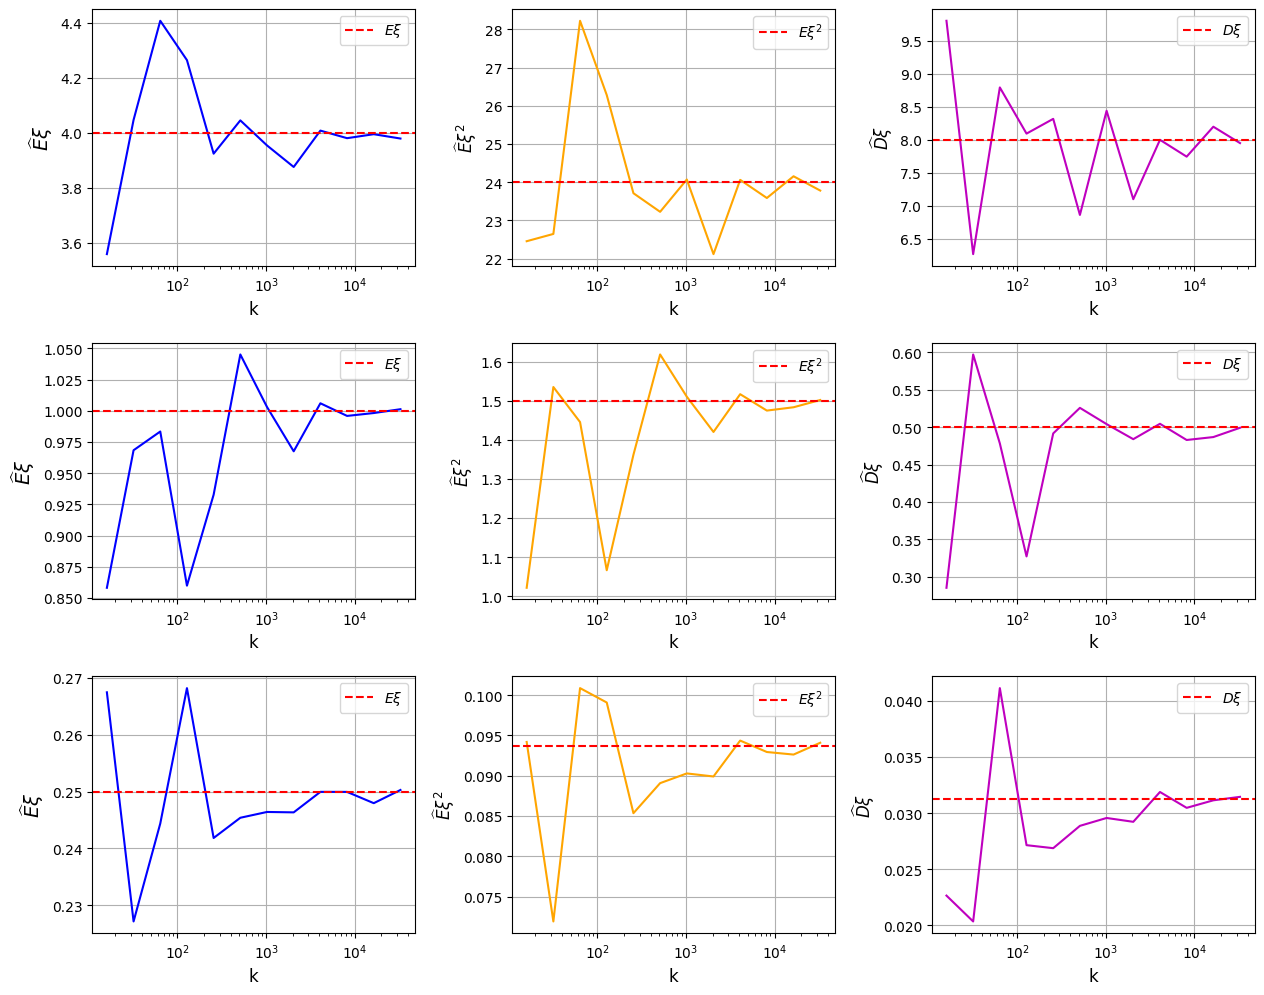

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

k_ = [2**i for i in range(4,16)]
thetas = [0.5, 2, 8]
fig, axs = plt.subplots(3, 3,figsize=(15, 12), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
idx = 0

for theta in thetas:
  means = []
  means_of_square = []
  vars = []
  for k in k_:
    sample = sps.gamma(a=2, scale=1/theta).rvs(size=k)
    means.append(np.mean(sample))
    means_of_square.append(np.mean(sample**2))
    vars.append(np.var(sample))

  # матожидание
  axs[idx,0].plot(k_ ,means, color='blue')
  axs[idx,0].axhline(2/theta, label='$E\\xi$', color='red', linestyle='dashed')
  axs[idx,0].set_xscale('log')
  axs[idx,0].set_xlabel('k', fontsize=12)
  axs[idx,0].set_ylabel('$\\widehat{E}\\xi$', fontsize=14)
  axs[idx,0].legend()
  axs[idx,0].grid(True)

  # матожидание квадрата
  axs[idx,1].plot(k_, means_of_square, color='orange')
  axs[idx,1].axhline(6/theta**2, label='$E\\xi^2$', color='red', linestyle='dashed')
  axs[idx,1].set_xscale('log')
  axs[idx,1].set_xlabel('k', fontsize=12)
  axs[idx,1].set_ylabel('$\\widehat{E}\\xi^2$', fontsize=12)
  axs[idx,1].legend()
  axs[idx,1].grid(True)

  # дисперсия
  axs[idx,2].plot(k_, vars, color='m')
  axs[idx,2].axhline(2/theta**2, label='$D\\xi$', color='red', linestyle='dashed')
  axs[idx,2].set_xscale('log')
  axs[idx,2].set_xlabel('k', fontsize=12)
  axs[idx,2].set_ylabel('$\\widehat{D}\\xi$', fontsize=12)
  axs[idx,2].legend()
  axs[idx,2].grid(True)


  idx+=1

# **1.2 Моделирование совместного распределения двух СВ**

**№ 1.**

Маргинальное распределение $\xi$:

$\mathsf{P}(\xi=-1)=\mathsf{P}(\xi=1)=\frac{2}{5}\sum^{∞}_{n=1}\frac{1}{2^n} = \frac{2}{5}$

$\mathsf{P}(\xi=0)=\frac{1}{5}\sum^{∞}_{n=1}\frac{1}{2^n} = \frac{1}{5}$

Получается:
$$
p_{-1} = \frac{2}{5}, p_{0} = \frac{1}{5}, p_{1} = \frac{2}{5}.
$$

$$
\sum^{}_{a}p_{a} = 1, \sum^{}_{k}q_{k} = 1,
$$

СВ $\xi$ и $\eta$ независимы, так как

$$\mathsf{P}(\xi=a,\eta=k)=\mathsf{P}(\xi=a)\mathsf{P}(\eta=k)$$

ТОгда $$\mathsf{cov}(\xi, \eta)=0 \quad \rho(\xi,\eta) = \frac{\mathsf{cov}(\xi, \eta)}{\sqrt{\mathsf{D}\xi}\cdot\sqrt{\mathsf{D}\eta}} =0.$$

Корреляционная матрица:

$$
R =
\begin{pmatrix}
1 & \rho(\xi,\eta)\\
\rho(\xi,\eta) & 1
\end{pmatrix}=\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}.
$$

In [7]:
c = {-1: 2/5, 0: 1/5, 1: 2/5}
xi_values = [-1, 0, 1]

def sample_xi_eta(n=100000):
    eta = np.random.geometric(0.5, size=n)

    probs = [c[-1], c[0], c[1]]
    xi = np.random.choice(xi_values, size=n, p=probs)

    return xi, eta

np.random.seed(42)
xi, eta = sample_xi_eta(100000)

corr = np.cov([xi, eta], ddof=1)

print('Корреляционная матрица:')
print('\n', corr)

Корреляционная матрица:

 [[0.8001375  0.00284597]
 [0.00284597 1.96965549]]
